In [1]:
import os
from glob import glob # get path for filde 
import pandas as pd 
from xml.etree import ElementTree as et # read and parse thông tin từ XML
from functools import reduce # help calculator min,max... in string 

In [2]:
# load all xml files and store in a list 
xml_list = glob('./data_images/*.xml')
# replace \\ with / for you do in windows
xmlfiles = list(map(lambda x: x.replace('\\','/'),xml_list))

In [3]:
xmlfiles

['./data_images/1000_jpg.rf.91e2a471e49071b24ee0f8ee72788930.xml',
 './data_images/1002_jpg.rf.b4be1a835384b2b69d67946e26cea361.xml',
 './data_images/1003_jpg.rf.f896d6f7dfd2bb8a014f22f2e9d68d7d.xml',
 './data_images/1004_jpg.rf.d352e5cd4ba20ad6faba552f706c5d1e.xml',
 './data_images/1005_jpg.rf.41e0f94f6d330fbab75cd61750c7534a.xml',
 './data_images/1006_jpg.rf.2c9873438f66909a5882b00778c158af.xml',
 './data_images/1007_jpg.rf.dd0ce9b24f714ab4b2b93dc5f73bcf1d.xml',
 './data_images/1008_jpg.rf.5ad4cfccb6efae32b49aa1e6fedc1ff9.xml',
 './data_images/1009_jpg.rf.bd8b94d18d39351f2926e24a9b49b31d.xml',
 './data_images/100_jpg.rf.126946c8899e4f5e7bbbdada4a4cea6f.xml',
 './data_images/1010_jpg.rf.fdd531864cf92fc2008d226e0e0c2330.xml',
 './data_images/1011_jpg.rf.48fa915a5396c44082a9d9d645406239.xml',
 './data_images/1012_jpg.rf.d7c92e533a06e562455854be6451a94a.xml',
 './data_images/1013_jpg.rf.17a906eb9ff26bb52c680f0e45afdcbd.xml',
 './data_images/1014_jpg.rf.9f2693de74e85d2bd4a13555984779fe.xm

In [4]:
# step-2: read xml files
# from each xml file we need to extract
# filename, size(width, height), object(name, xmin, xmax, ymin, ymax)
def extract_text(filename):
    tree = et.parse(filename)
    root = tree.getroot() # get root in filename

    # extract filename
    image_name = root.find('filename').text #get path to file
    # width and height of the image
    width = root.find('size').find('width').text
    height = root.find('size').find('height').text
    objs = root.findall('object') #get all object in file xml 
    parser = [] #create one null list 
    for obj in objs: #get name ,box,xmin.... of all object 
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = bndbox.find('xmin').text
        xmax = bndbox.find('xmax').text
        ymin = bndbox.find('ymin').text
        ymax = bndbox.find('ymax').text
        parser.append([image_name, width, height, name,xmin,xmax,ymin,ymax])
 
    return parser


In [5]:
parser_all = list(map(extract_text,xmlfiles))

In [6]:
data = reduce(lambda x, y : x+y,parser_all) #Merge lists then 1 list 2 columns and rows

In [7]:
df = pd.DataFrame(data,columns = ['filename','width','height','name','xmin','xmax','ymin','ymax'])

In [8]:
df.head() #list information of all file

,filename,width,height,name,xmin,xmax,ymin,ymax
0,1000_jpg.rf.91e2a471e49071b24ee0f8ee72788930.jpg,640,640,Face,351,398,28,158
1,1002_jpg.rf.b4be1a835384b2b69d67946e26cea361.jpg,640,640,Face,157,243,183,385
2,1003_jpg.rf.f896d6f7dfd2bb8a014f22f2e9d68d7d.jpg,640,640,Face,201,394,75,405
3,1004_jpg.rf.d352e5cd4ba20ad6faba552f706c5d1e.jpg,640,640,Face,101,404,182,391
4,1005_jpg.rf.41e0f94f6d330fbab75cd61750c7534a.jpg,640,640,Face,114,163,105,189


In [9]:
df.shape 

(2563, 8)

In [10]:
df['name'].value_counts()

name
Face    2563
Name: count, dtype: int64

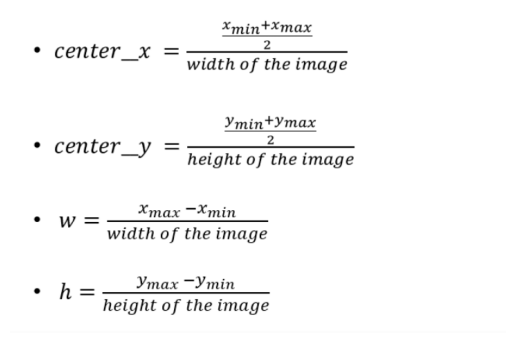

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

###Conversion
img = mpimg.imread('conversion.png')  
plt.imshow(img)
plt.axis('off')  
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2563 entries, 0 to 2562
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2563 non-null   object
 1   width     2563 non-null   object
 2   height    2563 non-null   object
 3   name      2563 non-null   object
 4   xmin      2563 non-null   object
 5   xmax      2563 non-null   object
 6   ymin      2563 non-null   object
 7   ymax      2563 non-null   object
dtypes: object(8)
memory usage: 160.3+ KB


In [13]:
# type conversion
cols = ['width','height','xmin','xmax','ymin','ymax']
df[cols] = df[cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2563 entries, 0 to 2562
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2563 non-null   object
 1   width     2563 non-null   int32 
 2   height    2563 non-null   int32 
 3   name      2563 non-null   object
 4   xmin      2563 non-null   int32 
 5   xmax      2563 non-null   int32 
 6   ymin      2563 non-null   int32 
 7   ymax      2563 non-null   int32 
dtypes: int32(6), object(2)
memory usage: 100.2+ KB


In [14]:
# center x, center y
df['center_x'] = ((df['xmax']+df['xmin'])/2)/df['width']
df['center_y'] = ((df['ymax']+df['ymin'])/2)/df['height']
# w 
df['w'] = (df['xmax']-df['xmin'])/df['width']
# h 
df['h'] = (df['ymax']-df['ymin'])/df['height']

In [15]:
df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,1000_jpg.rf.91e2a471e49071b24ee0f8ee72788930.jpg,640,640,Face,351,398,28,158,0.585156,0.145313,0.073438,0.203125
1,1002_jpg.rf.b4be1a835384b2b69d67946e26cea361.jpg,640,640,Face,157,243,183,385,0.312500,0.443750,0.134375,0.315625
2,1003_jpg.rf.f896d6f7dfd2bb8a014f22f2e9d68d7d.jpg,640,640,Face,201,394,75,405,0.464844,0.375000,0.301563,0.515625
3,1004_jpg.rf.d352e5cd4ba20ad6faba552f706c5d1e.jpg,640,640,Face,101,404,182,391,0.394531,0.447656,0.473438,0.326562
4,1005_jpg.rf.41e0f94f6d330fbab75cd61750c7534a.jpg,640,640,Face,114,163,105,189,0.216406,0.229687,0.076563,0.131250


### Split data into train and test

In [16]:
images = df['filename'].unique()

In [17]:
len(images)

1460

In [18]:
# 80% train and 20% test
img_df = pd.DataFrame(images,columns=['filename'])
img_train = tuple(img_df.sample(frac=0.8)['filename']) # shuffle and pick 80% of images

In [19]:
img_test = tuple(img_df.query(f'filename not in {img_train}')['filename']) # take rest 20% images

In [20]:
len(img_train), len(img_test)

(1168, 292)

In [21]:
train_df = df.query(f'filename in {img_train}')
test_df = df.query(f'filename in {img_test}')

In [22]:
train_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
1,1002_jpg.rf.b4be1a835384b2b69d67946e26cea361.jpg,640,640,Face,157,243,183,385,0.312500,0.443750,0.134375,0.315625
2,1003_jpg.rf.f896d6f7dfd2bb8a014f22f2e9d68d7d.jpg,640,640,Face,201,394,75,405,0.464844,0.375000,0.301563,0.515625
4,1005_jpg.rf.41e0f94f6d330fbab75cd61750c7534a.jpg,640,640,Face,114,163,105,189,0.216406,0.229687,0.076563,0.131250
5,1005_jpg.rf.41e0f94f6d330fbab75cd61750c7534a.jpg,640,640,Face,278,326,39,124,0.471875,0.127344,0.075000,0.132812
6,1006_jpg.rf.2c9873438f66909a5882b00778c158af.jpg,640,640,Face,329,484,168,338,0.635156,0.395313,0.242188,0.265625


In [23]:
test_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,1000_jpg.rf.91e2a471e49071b24ee0f8ee72788930.jpg,640,640,Face,351,398,28,158,0.585156,0.145313,0.073438,0.203125
3,1004_jpg.rf.d352e5cd4ba20ad6faba552f706c5d1e.jpg,640,640,Face,101,404,182,391,0.394531,0.447656,0.473438,0.326562
29,101_jpg.rf.6b054e2590dc9f6cb4a7d5aa224c9210.jpg,640,640,Face,67,189,193,377,0.200000,0.445312,0.190625,0.287500
30,101_jpg.rf.6b054e2590dc9f6cb4a7d5aa224c9210.jpg,640,640,Face,308,403,218,361,0.555469,0.452344,0.148438,0.223438
31,101_jpg.rf.6b054e2590dc9f6cb4a7d5aa224c9210.jpg,640,640,Face,505,627,105,277,0.884375,0.298438,0.190625,0.268750


#### Assign id number to object names

In [24]:
# label encoding
def label_encoding(x):
    labels = {'Face':0}
    return labels[x]

In [25]:
train_df['id'] = train_df['name'].apply(label_encoding)
test_df['id'] = test_df['name'].apply(label_encoding)

C:\Users\VIP\AppData\Local\Temp\ipykernel_19316\3116627190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['id'] = train_df['name'].apply(label_encoding)
C:\Users\VIP\AppData\Local\Temp\ipykernel_19316\3116627190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['id'] = test_df['name'].apply(label_encoding)


In [26]:
train_df.head(10)

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h,id
1,1002_jpg.rf.b4be1a835384b2b69d67946e26cea361.jpg,640,640,Face,157,243,183,385,0.312500,0.443750,0.134375,0.315625,0
2,1003_jpg.rf.f896d6f7dfd2bb8a014f22f2e9d68d7d.jpg,640,640,Face,201,394,75,405,0.464844,0.375000,0.301563,0.515625,0
4,1005_jpg.rf.41e0f94f6d330fbab75cd61750c7534a.jpg,640,640,Face,114,163,105,189,0.216406,0.229687,0.076563,0.131250,0
5,1005_jpg.rf.41e0f94f6d330fbab75cd61750c7534a.jpg,640,640,Face,278,326,39,124,0.471875,0.127344,0.075000,0.132812,0
6,1006_jpg.rf.2c9873438f66909a5882b00778c158af.jpg,640,640,Face,329,484,168,338,0.635156,0.395313,0.242188,0.265625,0
7,1007_jpg.rf.dd0ce9b24f714ab4b2b93dc5f73bcf1d.jpg,640,640,Face,156,276,235,478,0.337500,0.557031,0.187500,0.379688,0
8,1008_jpg.rf.5ad4cfccb6efae32b49aa1e6fedc1ff9.jpg,640,640,Face,256,491,38,400,0.583594,0.342187,0.367188,0.565625,0
9,1009_jpg.rf.bd8b94d18d39351f2926e24a9b49b31d.jpg,640,640,Face,250,398,116,353,0.506250,0.366406,0.231250,0.370312,0
10,100_jpg.rf.126946c8899e4f5e7bbbdada4a4cea6f.jpg,640,640,Face,251,424,94,226,0.527344,0.250000,0.270313,0.206250,0
11,1010_jpg.rf.fdd531864cf92fc2008d226e0e0c2330.jpg,640,640,Face,264,379,51,304,0.502344,0.277344,0.179688,0.395313,0


#### Save Image and Labels in text

In [27]:
import os
from shutil import move

In [28]:
train_folder = 'data_images/train'
test_folder = 'data_images/test'


os.mkdir(train_folder)
os.mkdir(test_folder)

In [29]:
cols = ['filename','id','center_x','center_y', 'w', 'h']
groupby_obj_train = train_df[cols].groupby('filename')
groupby_obj_test = test_df[cols].groupby('filename')

In [31]:
#groupby_obj_train.get_group('000009.jpg').set_index('filename').to_csv('sample.txt',index=False,header=False)
# save each image in train/test folder and repective labels in .txt
def save_data(filename, folder_path, group_obj):
    # move image
    src = os.path.join('data_images',filename)
    dst = os.path.join(folder_path,filename)
    move(src,dst) # move image to the destination folder
    
    # save the labels
    text_filename = os.path.join(folder_path,
                                 os.path.splitext(filename)[0]+'.txt')
    group_obj.get_group(filename).set_index('filename').to_csv(text_filename,sep=' ',index=False,header=False)

In [32]:
filename_series = pd.Series(groupby_obj_train.groups.keys())

In [33]:
filename_series.apply(save_data,args=(train_folder,groupby_obj_train))

0       None
1       None
2       None
3       None
4       None
        ... 
1163    None
1164    None
1165    None
1166    None
1167    None
Length: 1168, dtype: object

In [34]:
filename_series_test = pd.Series(groupby_obj_test.groups.keys())
filename_series_test.apply(save_data,args=(test_folder,groupby_obj_test))

0      None
1      None
2      None
3      None
4      None
       ... 
287    None
288    None
289    None
290    None
291    None
Length: 292, dtype: object